In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import missingno as msn 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve


## Carga del DataSet y exploracion

In [2]:
dftrain = pd.read_csv('archive//creditcardcsvpresent.csv', engine='python', encoding = "utf-8")


In [3]:
dftrain.head(5)

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [4]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

## Validando si hay Nulos

<AxesSubplot:>

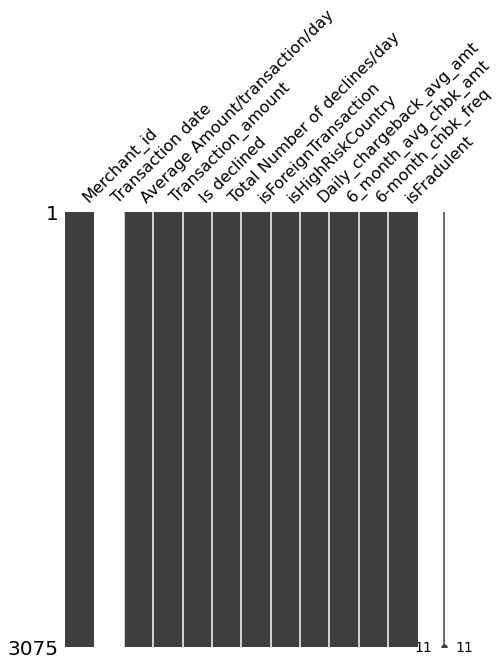

In [5]:
# viendo nulos graficamente
msn.matrix(dftrain, figsize=(7, 8))

In [6]:
# porcentaje de nulos por campo
(dftrain.isnull().sum() / dftrain.shape[0]) * 100 

Merchant_id                         0.0
Transaction date                  100.0
Average Amount/transaction/day      0.0
Transaction_amount                  0.0
Is declined                         0.0
Total Number of declines/day        0.0
isForeignTransaction                0.0
isHighRiskCountry                   0.0
Daily_chargeback_avg_amt            0.0
6_month_avg_chbk_amt                0.0
6-month_chbk_freq                   0.0
isFradulent                         0.0
dtype: float64

In [7]:
dftrain.dtypes

Merchant_id                         int64
Transaction date                  float64
Average Amount/transaction/day    float64
Transaction_amount                float64
Is declined                        object
Total Number of declines/day        int64
isForeignTransaction               object
isHighRiskCountry                  object
Daily_chargeback_avg_amt            int64
6_month_avg_chbk_amt              float64
6-month_chbk_freq                   int64
isFradulent                        object
dtype: object

In [19]:
dftrain['Transaction date']= '1901-01-01'

# Variables Numericas

In [20]:
# viendo info general del dataset
dftrain.describe(include='all')

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
count,3.075000e+03,3075,3075.000000,3075.000000,3075,3075.000000,3075,3075,3075.000000,3075.000000,3075.000000,3075
unique,NaN,1,NaN,NaN,2,NaN,2,2,NaN,NaN,NaN,2
top,NaN,1901-01-01,NaN,NaN,N,NaN,N,N,NaN,NaN,NaN,N
freq,NaN,3075,NaN,NaN,3018,NaN,2369,2870,NaN,NaN,NaN,2627
mean,5.026634e+09,NaN,515.026556,9876.399210,NaN,0.957398,NaN,NaN,55.737561,40.022407,0.391870,NaN
std,9.870778e+08,NaN,291.906978,10135.331016,NaN,2.192391,NaN,NaN,206.634779,155.968840,1.548479,NaN
min,3.160041e+09,NaN,4.011527,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,4.170814e+09,NaN,269.788047,2408.781147,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
50%,5.025578e+09,NaN,502.549575,6698.891856,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
75%,5.889625e+09,NaN,765.272803,14422.568935,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN


# Variables Categoricas

In [21]:
# Separando Data Set en variables numericas y categoricas
df_numericas= dftrain.select_dtypes(exclude=['object'])
print('Variables Numericas ',df_numericas.shape)

df_categoricas= dftrain.select_dtypes(include=['object'])
print('Variables Categoricas ',df_categoricas.shape)

Variables Numericas  (3075, 7)
Variables Categoricas  (3075, 5)


In [22]:
# Variables Categoricas
for col in df_categoricas.columns:
    print('Columna ',col)
    print(df_categoricas[col].unique())
    print(df_categoricas[col].value_counts())

Columna  Transaction date
['1901-01-01']
1901-01-01    3075
Name: Transaction date, dtype: int64
Columna  Is declined
['N' 'Y']
N    3018
Y      57
Name: Is declined, dtype: int64
Columna  isForeignTransaction
['Y' 'N']
N    2369
Y     706
Name: isForeignTransaction, dtype: int64
Columna  isHighRiskCountry
['Y' 'N']
N    2870
Y     205
Name: isHighRiskCountry, dtype: int64
Columna  isFradulent
['Y' 'N']
N    2627
Y     448
Name: isFradulent, dtype: int64


# Matriz de Correlacion

In [23]:
correlacion= df_numericas.corr()

In [24]:
correlacion.style.background_gradient(cmap='coolwarm')

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
Merchant_id,1.000000,0.018223,0.046065,-0.016165,0.088802,0.091621,0.118599
Average Amount/transaction/day,0.018223,1.000000,0.587111,-0.009682,0.060429,0.060284,0.071849
Transaction_amount,0.046065,0.587111,1.000000,0.259309,0.252298,0.259663,0.297623
Total Number of declines/day,-0.016165,-0.009682,0.259309,1.000000,0.094834,0.081138,0.085028
Daily_chargeback_avg_amt,0.088802,0.060429,0.252298,0.094834,1.000000,0.953663,0.884611
6_month_avg_chbk_amt,0.091621,0.060284,0.259663,0.081138,0.953663,1.000000,0.851339
6-month_chbk_freq,0.118599,0.071849,0.297623,0.085028,0.884611,0.851339,1.000000


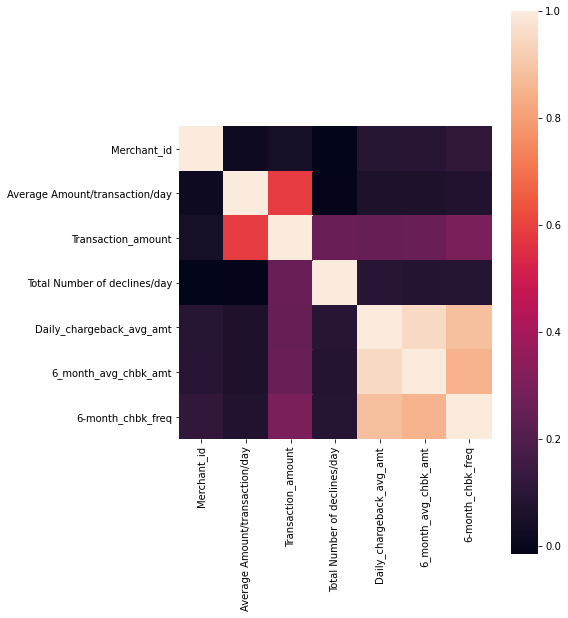

In [25]:
fig, ax = plt.subplots(figsize=(7,10))
sns.heatmap(correlacion, square=True)
plt.show()

### AGrupamiento

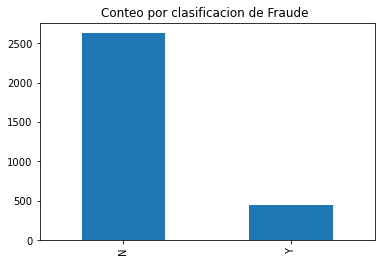

In [27]:
dftrain.isFradulent.value_counts().plot(kind='bar', title='Conteo por clasificacion de Fraude ');